In [1]:
import pandas, seaborn, matplotlib

# user-defined variables

In [2]:
gold_file = '/Users/adrian/tmp/gold.csv'
skyblue_file = '/Users/adrian/tmp/skyblue.csv'

# read data

In [3]:
gold_df = pandas.read_csv(gold_file, index_col=0)
print(gold_df.shape)

skyblue_df = pandas.read_csv(skyblue_file, index_col=0)
print(skyblue_df.shape)

(2346, 4385)
(4252, 4385)


# define best order for gold cluster

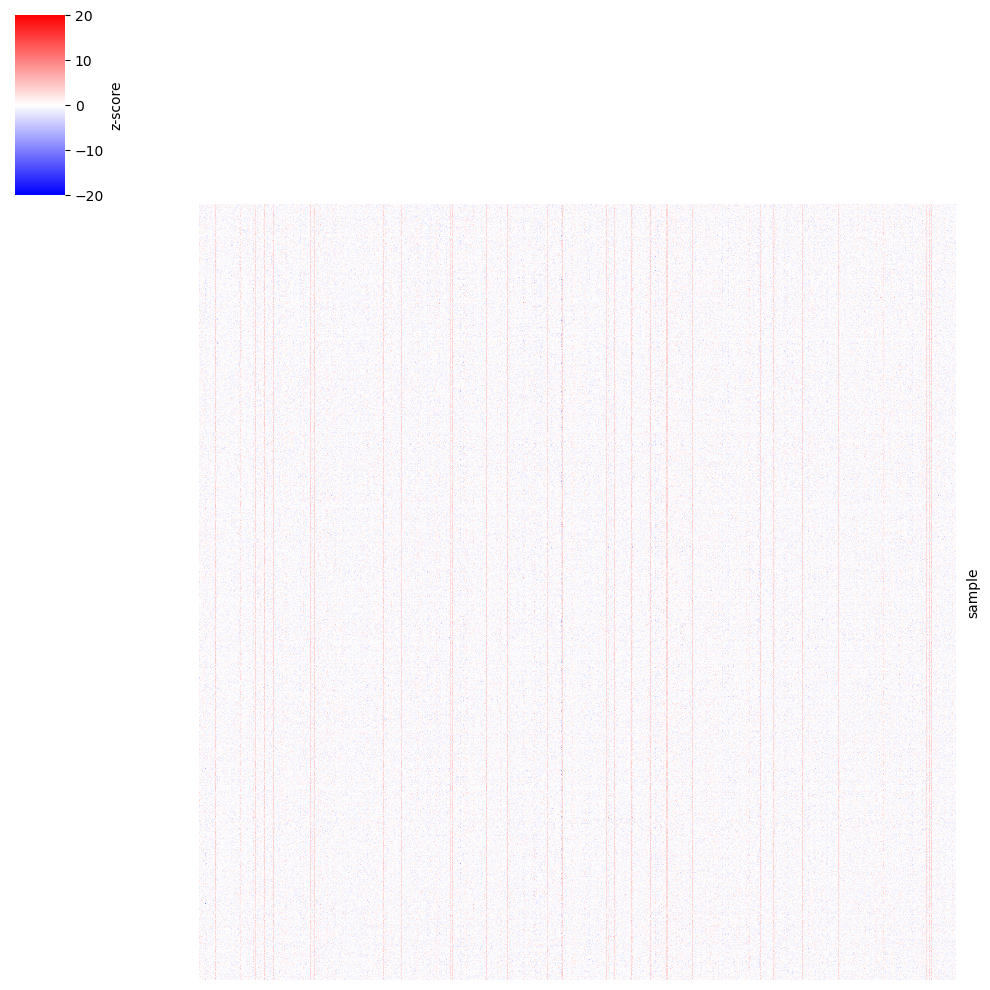

In [4]:
seaborn.clustermap(gold_df, 
                   cmap='bwr', 
                   row_cluster=False, 
                   col_cluster=False, 
                   vmin=-20, vmax=20, 
                   cbar_kws={'label':'z-score'},
                   xticklabels=False, yticklabels=False
                  )
matplotlib.pyplot.show()

CPU times: user 34.4 s, sys: 241 ms, total: 34.6 s
Wall time: 34.1 s


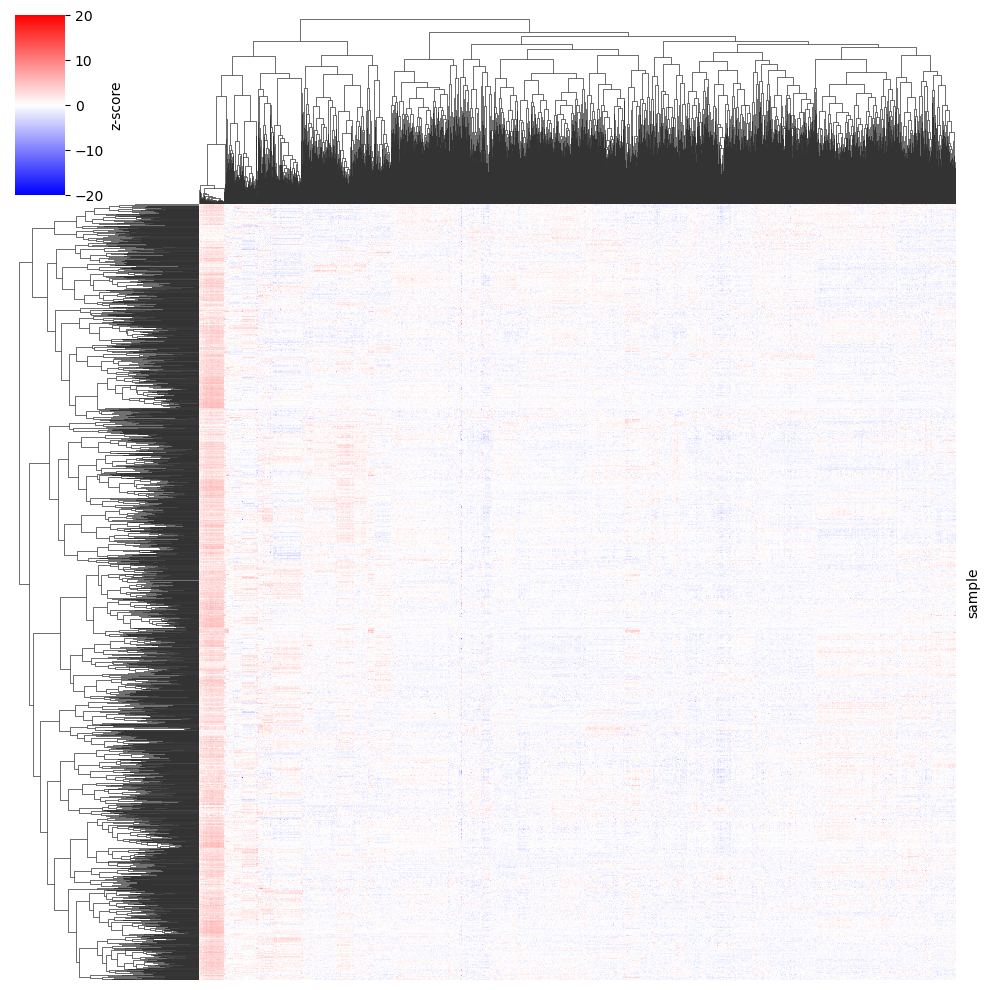

In [5]:
%%time
linkage_method = 'complete'
distance_metric = 'cosine'

clustergrid = seaborn.clustermap(gold_df, 
                   cmap='bwr', 
                   row_cluster=True, 
                   col_cluster=True, 
                   vmin=-20, vmax=20, 
                   cbar_kws={'label':'z-score'},
                   xticklabels=False, yticklabels=False, 
                   method=linkage_method, metric=distance_metric
                  )

In [6]:
reordered_gold = gold_df.iloc[clustergrid.dendrogram_row.reordered_ind, :]

# define best order for skyblue cluster

CPU times: user 1min 18s, sys: 545 ms, total: 1min 19s
Wall time: 1min 19s


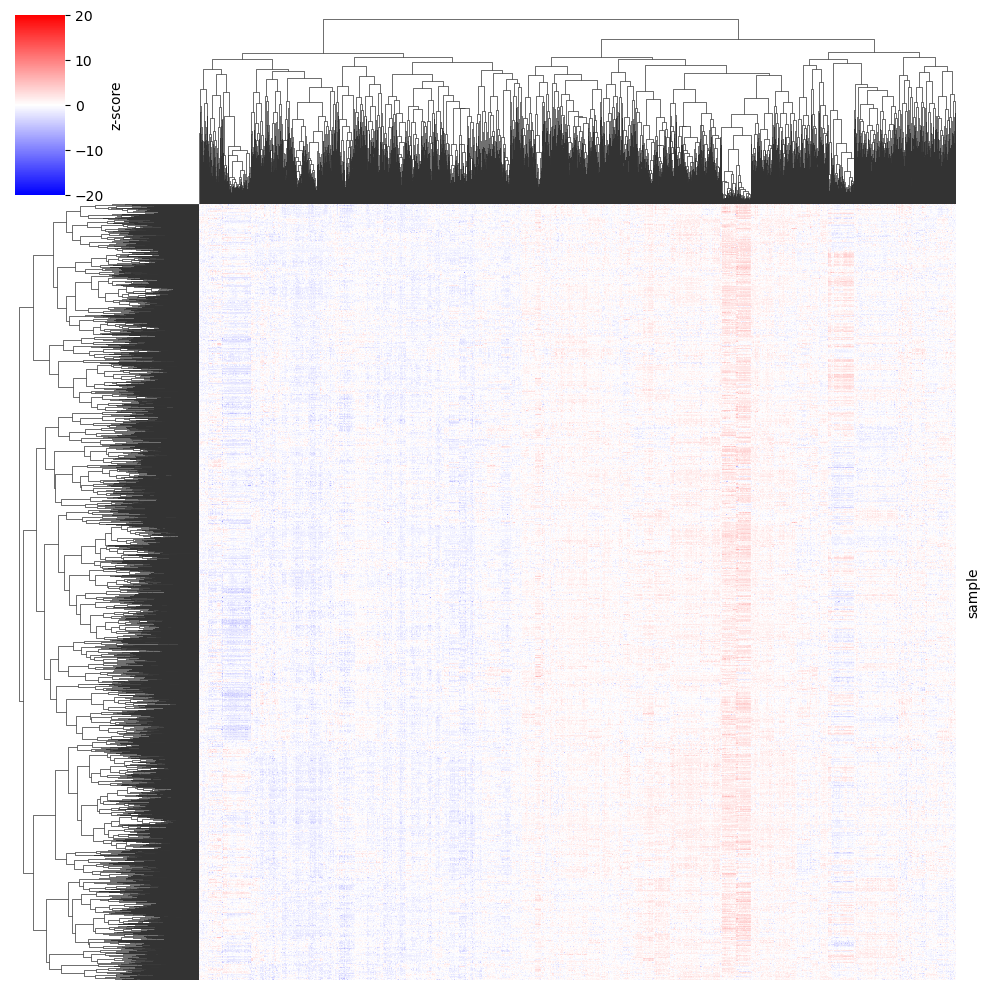

In [7]:
%%time
linkage_method = 'complete'
distance_metric = 'cosine'

clustergrid = seaborn.clustermap(skyblue_df, 
                   cmap='bwr', 
                   row_cluster=True, 
                   col_cluster=True, 
                   vmin=-20, vmax=20, 
                   cbar_kws={'label':'z-score'},
                   xticklabels=False, yticklabels=False, 
                   method=linkage_method, metric=distance_metric
                  )

In [8]:
reordered_skyblue = skyblue_df.iloc[clustergrid.dendrogram_row.reordered_ind, :]

# join

In [9]:
print(reordered_gold.shape)
print(reordered_skyblue.shape)

(2346, 4385)
(4252, 4385)


In [10]:
row_colors = []
for i in range(reordered_gold.shape[0]):
    row_colors.append('gold')
for i in range(reordered_skyblue.shape[0]):
    row_colors.append('skyblue')

In [11]:
frames = [reordered_gold, reordered_skyblue]
result = pandas.concat(frames)
print(result.shape)

(6598, 4385)


In [12]:
print(result.min().min())
print(result.max().max())

-14.88701243994536
11.081926341742069


In [ ]:
consider doing five as range


# cluster conditions

CPU times: user 1min 4s, sys: 765 ms, total: 1min 5s
Wall time: 1min 5s


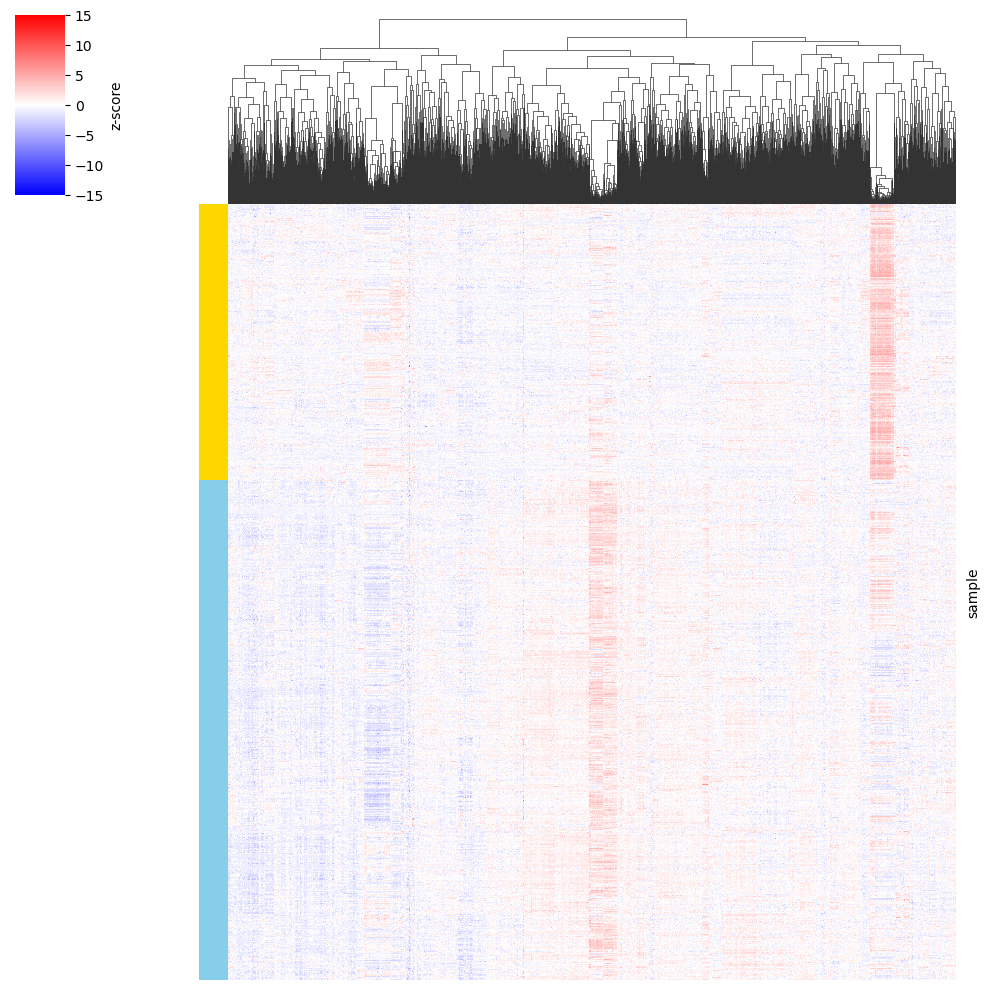

In [13]:
%%time
linkage_method = 'complete'
distance_metric = 'cosine'

clustergrid = seaborn.clustermap(result, 
                                 cmap='bwr', 
                                 row_cluster=False, 
                                 col_cluster=True, 
                                 vmin=-15, vmax=15, 
                                 cbar_kws={'label':'z-score'},
                                 xticklabels=False, yticklabels=False, 
                                 method=linkage_method, metric=distance_metric,
                                 row_colors=row_colors
                  )

CPU times: user 2min 35s, sys: 1.13 s, total: 2min 36s
Wall time: 2min 35s


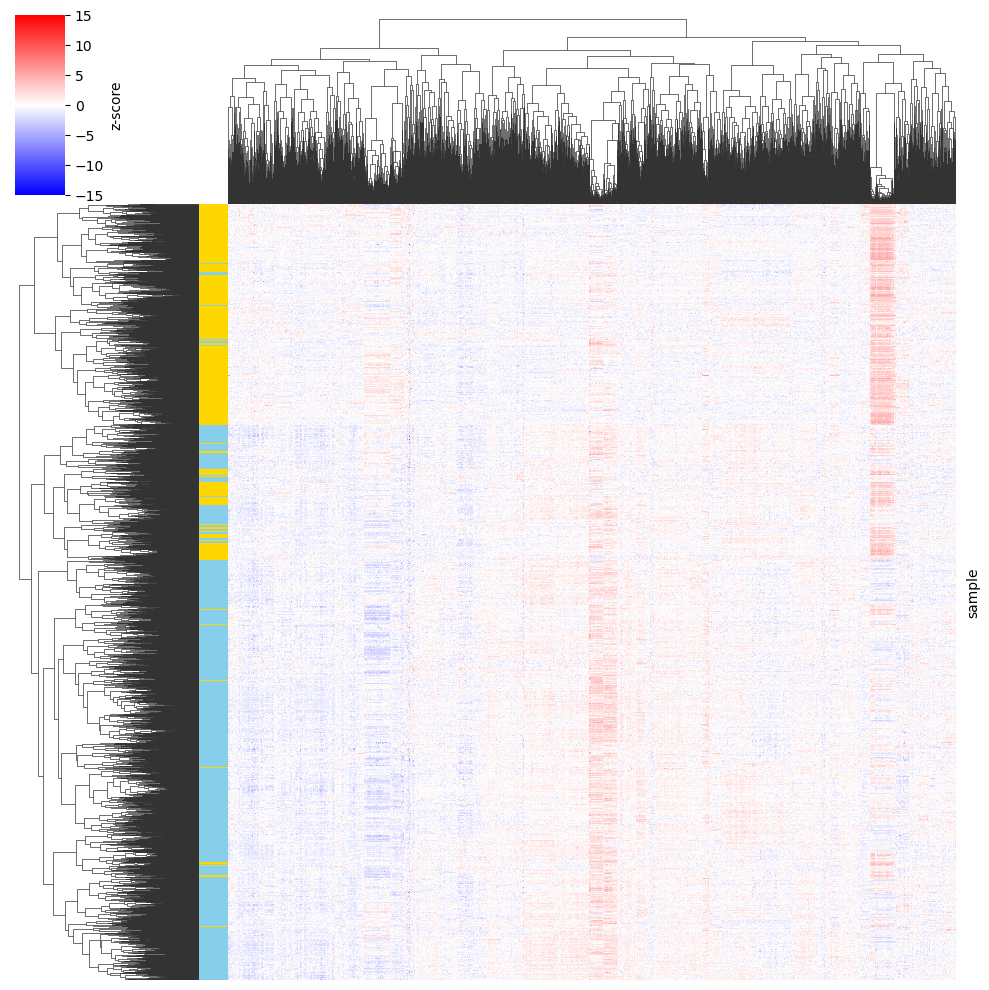

In [14]:
%%time
linkage_method = 'complete'
distance_metric = 'cosine'

clustergrid = seaborn.clustermap(result, 
                                 cmap='bwr', 
                                 row_cluster=True, 
                                 col_cluster=True, 
                                 vmin=-15, vmax=15, 
                                 cbar_kws={'label':'z-score'},
                                 xticklabels=False, yticklabels=False, 
                                 method=linkage_method, metric=distance_metric,
                                 row_colors=row_colors
                  )